In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import run_smogn, read_datacube
from config import data_path, resample_path

In [2]:
df = read_datacube(data_path)
df.head(3)

file opening...
file loading complete
now converting datasets to dataframe


,dtr,tmx,wet,agb,Tree_Broadleaf_Evergreen,Tree_Broadleaf_Deciduous,Tree_Needleleaf_Evergreen,Tree_Needleleaf_Deciduous,Shrub_Broadleaf_Evergreen,Shrub_Broadleaf_Deciduous,...,FPAR_06mon,LAI_06mon,VOD_06mon,sm_06mon,FPAR_12mon,LAI_12mon,VOD_12mon,sm_12mon,WDPA_fracCover,lightning
0,12.2,36.400002,10.36,0.0,0.003041,0.008011,0.002689,0.000352,0.00743,0.471307,...,0.203942,0.382504,-0.066674,0.145733,0.203942,0.382504,-0.066674,0.145733,0.0,0.505372
1,10.3,34.500000,17.10,0.0,0.003041,0.008011,0.002689,0.000352,0.00743,0.471307,...,0.224942,0.425181,-0.051060,0.233461,0.224942,0.425181,-0.051060,0.233461,0.0,0.347286
2,12.0,34.600002,6.39,0.0,0.003041,0.008011,0.002689,0.000352,0.00743,0.471307,...,0.324616,0.607549,-0.046661,0.160115,0.324616,0.607549,-0.046661,0.160115,0.0,0.102413


file opening...
file loading complete
now converting datasets to dataframe
Running Smogn...
start smogn


r_index: 100%|##########| 695/695 [00:01<00:00, 552.78it/s]


post-proc
SMOGN complete...
non zeros in new data:
8014
non zeros in old data:
4206


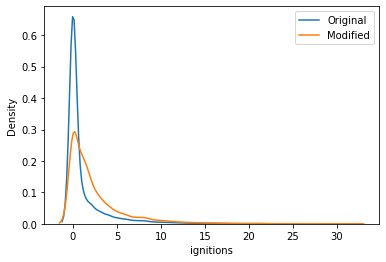

SMOGN runtime: 0:00:11.459980


In [2]:
startTime = datetime.now()
run_smogn(data_path, parallel=True, rel_thresh=0.1)
print("SMOGN runtime: {}".format(datetime.now() - startTime))

start smogn


r_index: 100%|##########| 695/695 [00:01<00:00, 523.61it/s]


post-proc
non zeros in new data:
7993
non zeros in old data:
4206


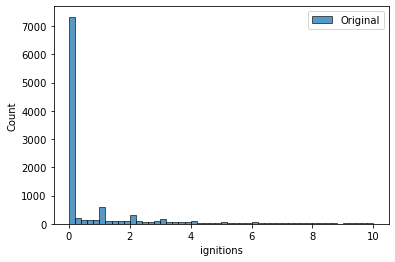

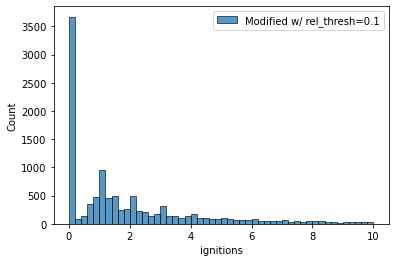

In [4]:
run_smogn(data_path, parallel=True, rel_thresh=0.1, silent=True)
df_resampled = pd.read_pickle(resample_path)
df = read_datacube(data_path, silent=True)

print('non zeros in new data:')
print(df_resampled['ignitions'].astype(bool).sum(axis=0))
print('non zeros in old data:')
print(df['ignitions'].astype(bool).sum(axis=0))

## plot y distribution
sns.histplot(df['ignitions'], label="Original", bins=50, binrange=[0,10])
plt.legend()
plt.show()
sns.histplot(df_resampled['ignitions'], label="Modified w/ rel_thresh=0.1", bins=50, binrange=[0,10])
plt.legend()
plt.show()

start smogn


r_index: 100%|##########| 695/695 [00:01<00:00, 524.66it/s]


post-proc


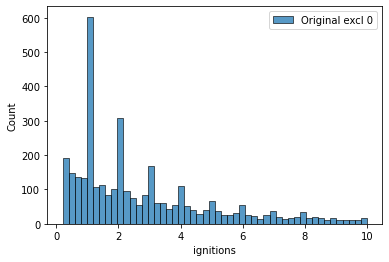

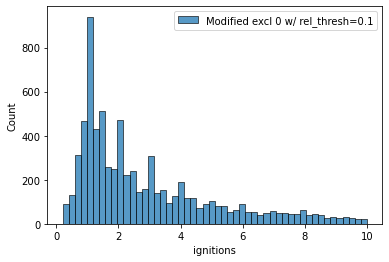

In [6]:
run_smogn(data_path, parallel=True, rel_thresh=0.1, silent=True)
df_resampled = pd.read_pickle(resample_path)
sns.histplot(df.ignitions, bins=50,  binrange=[0.2,10], label="Original excl 0")
plt.legend()
plt.show()
sns.histplot(df_resampled.ignitions, bins=50,  binrange=[0.2,10], label="Modified excl 0 w/ rel_thresh=0.1")
plt.legend()
plt.show()

start smogn


r_index: 100%|##########| 1240/1240 [00:02<00:00, 500.89it/s]


post-proc


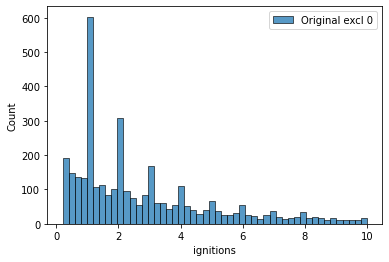

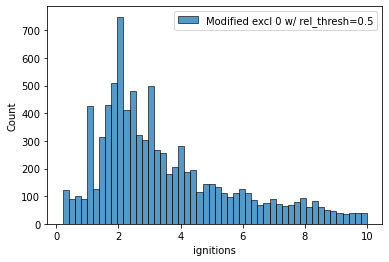

In [7]:
run_smogn(data_path, parallel=True, rel_thresh=0.5, silent=True)
df_resampled = pd.read_pickle(resample_path)
sns.histplot(df.ignitions, bins=50,  binrange=[0.2,10], label="Original excl 0")
plt.legend()
plt.show()
sns.histplot(df_resampled.ignitions, bins=50,  binrange=[0.2,10], label="Modified excl 0 w/ rel_thresh=0.5")
plt.legend()
plt.show()